In [ ]:
import matplotlib.pyplot as plt    #Biblioteka do tworzenia wykresów
import numpy as np                 #Biblioteka podstawowych operacji na wektorach i macierzach w tym wielowymiarowych
from scipy.optimize import fsolve      #Podzbiór biblioteki scipy do obliczeń numerycznych zawierający funkcje optymalizacyjne
from scipy.interpolate import interp1d #Podzbiór biblioteki scipy do obliczeń numerycznych zawierający funkcje interpolujące
from scipy.integrate import quad       #Podzbiór biblioteki scipy do obliczeń numerycznych zawierający funkcje całkujące

<h2>ROZDZIAŁ VII</h2>
<h3>7 CAŁKOWANIE NUMERYCZNE</h3>
<h4>7.1. PRZYKŁADY ZADAŃ INŻYNIERSKICH</h4>

<b>Przykład 7.1. Praca potrzebna do zniszczenia próbki ze stopu aluminium</b>

Na podstawie danych zamieszczonych w tabeli 7.1 wykreślono krzywą monotonicznego rozciągania (rys. 7.1). Oblicz pracę, jaka jest potrzebna do zniszczenia elementarnej objętości pewnego stopu aluminium.

Tabela 7.1.	Współrzędne wybranych punktów wykresu rozciągania stopu aluminium
<table style="border: 1px solid black;">
    <tr>
        <td style="border: 1px solid black;">$\epsilon$</td>
        <td style="border: 1px solid black;">0.0000</td>
        <td style="border: 1px solid black;">0.0054</td>
        <td style="border: 1px solid black;">0.0407</td>
        <td style="border: 1px solid black;">0.1053</td>
        <td style="border: 1px solid black;">0.1597</td>
        <td style="border: 1px solid black;">0.2000</td>
        <td style="border: 1px solid black;">0.2183</td>
    </tr>
    <tr>
        <td style="border: 1px solid black;">$\sigma$ [MPa]</td>
        <td style="border: 1px solid black;">0</td>
        <td style="border: 1px solid black;">323</td>
        <td style="border: 1px solid black;">402</td>
        <td style="border: 1px solid black;">458</td>
        <td style="border: 1px solid black;">477</td>
        <td style="border: 1px solid black;">473</td>
        <td style="border: 1px solid black;">452</td>
    </tr>
</table>

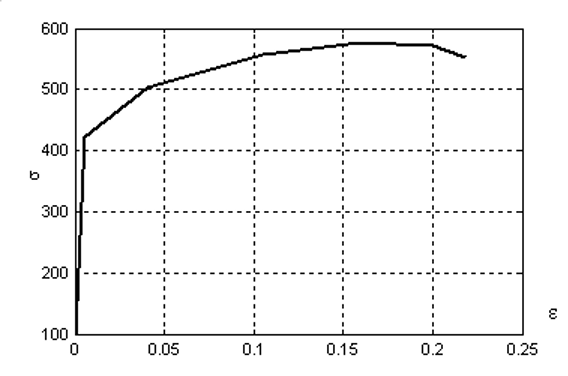
Rys. 7.1. Wykres monotonicznego rozciągania stopu aluminium

Energia mechaniczna potrzebna do realizacji jednoosiowego rozciągania na jednostkę objętości próbki wyrażona jest całką (7.1): 
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $
        U=\int_{0}^{\epsilon }\sigma d\epsilon
        $
        </td>
        <td>(7.1)</td>
    </tr>
</table>
Całka ta wyraża pole pod wykresem monotonicznego rozciągania.

<b>Przykład 7.2. Przepływ cieczy przez okrągłą rurkę</b>

Przez rurkę o promieniu R i długości l przepłynie objętość cieczy dana całką:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $V=t\int_{0}^{R}2\pi rv(r)dr$
        </td>
        <td>(7.2)</td>
    </tr>
</table>
gdzie funkcja $v(r)=\frac{\Delta p}{4 \eta l}\left ( R^{2}-r^{2} \right )$ jest rozkładem prędkości cieczy na promieniu r (rys. 7.2).
 
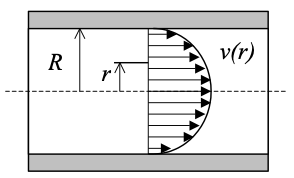
Rys. 7.2. Rozkład prędkości przy laminarnym przepływie cieczy przez rurkę

Wiedząc, że lepkość cieczy wynosi $\eta\approx 1\cdot 10^{-3}$ Pa s, długość rurki l = 10 m, jej promień wewnętrzny R = 8 mm, oblicz objętość cieczy, która pod wpływem różnicy ciśnień $\Delta P$=10 kPa  przepłynie w czasie 1 godziny.

Zadanie sprowadza się do obliczenia wartości całki (7.2).

<h3>7.2. CHARAKTERYSTYKA ZAGADNIENIA</h3> 

Istnieje szereg problemów inżynierskich, które prowadzą do zadania wyznaczania całki oznaczonej, np.: obliczanie powierzchni lub objętości obszarów, wyznaczanie współrzędnych środków ciężkości, obliczanie drogi przebytej przez obiekt poruszający się ze zmienną prędkością, obliczanie pracy na podstawie zmiennej w czasie mocy, itd.

Wartość całki oznaczonej:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $I=\int_{a}^{b}f(x) dx$
        </td>
        <td>(7.2)</td>
    </tr>
</table>
może być obliczona numerycznie. Ma to oczywisty sens w przypadku, kiedy znamy tylko dyskretne wartości funkcji f(x) oraz w przypadku, kiedy analityczna postać tej funkcji jest znana, ale uzyskanie wartości tej funkcji jest czasochłonne.

Większość algorytmów numerycznego całkowania opiera się na zastosowaniu wielomianu interpolującego, przybliżającego przebieg funkcji f(x), i jego późniejszym całkowaniu. W tym celu muszą być znane wartości funkcji w punktach zwanych węzłami x<sub>i</sub>. Węzły muszą pokrywać interesujący nas przedział [a, b], tzn. a ≤ x<sub>1</sub> < x<sub>2</sub> … x<sub>n</sub> ≤ b.

Praktyką często stosowaną w celu zwiększenia dokładności jest podział przedziału [a, b] na N podprzedziałów. Wówczas, jak to wykazano w rozdziale VI, do interpolacji można zastosować wielomiany niższego rzędu.

Metody całkowania różnią się między sobą stopniem wielomianu interpolującego oraz liczbą i sposobem wyboru położenia węzłów x<sub>i</sub>. W niektórych metodach węzły są rozmieszczone równomiernie, w innych ich położenie optymalizuje się tak, aby zminimalizować błąd obliczeń.

<h4>7.3. METODY</h4>

<h5>7.3.1. Zasada Newtona-Cotesa</h5>

Metody zaliczane do tej grupy obliczają przybliżoną wartość całki na podstawie wielomianu interpolacyjnego stopnia n – 1, poprowadzonego przez n równo rozmieszczonych węzłów.

<h5>7.3.1.1. Zasada trapezów</h5>

W metodzie całkowania opartej na zasadzie trapezów stosuje się interpolację liniową na dwóch węzłach (rys. 7.3). 

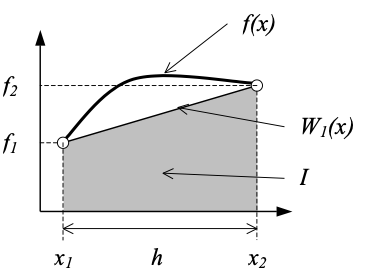
Rys. 7.3. Zasada trapezów

Wielomianem interpolacyjnym może być wielomian Lagrange’a w postaci:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $W_{1}\left ( x \right )=\frac{x-x_{2}}{x_{1}-x_{2}}f_{1}+\frac{x-x_{1}}{x_{2}-x_{1}}f_{2}$
        </td>
        <td>(7.3)</td>
    </tr>
</table>
Po scałkowaniu wielomianu (7.3), przybliżona wartość całki wynosi:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $I=\int_{x_{1}}^{x_{2}}f(x)dx\approx \int_{x_{1}}^{x_{2}}W_{1}(x)dx=\frac{h}{2}f_{1}+\frac{h}{2}f_{2}=\frac{h}{2}\left ( f_{1}+f_{2} \right )$
        </td>
        <td>(7.4)</td>
    </tr>
</table>
Popełniany w tym przypadku błąd jest funkcją h<sup>3</sup>. W celu zwiększenia dokładności, całkowany przedział możemy podzielić na podprzedziały (rys. 7.4). Wówczas:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $I=\int_{x_{1}}^{x_{2}}f(x)dx+\int_{x_{2}}^{x_{3}}f(x)dx+\cdots +\int_{x_{n-1}}^{x_{n}}f(x)dx\approx$
$\approx \frac{h}{2}\left ( f_{1}+f_{2} \right )+\frac{h}{2}\left ( f_{2}+f_{3} \right )+\cdots+\frac{h}{2}\left ( f_{n-1}+f_{n} \right )$
        </td>
        <td>(7.5)</td>
    </tr>
</table>
Ostatecznie:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $I = \frac{h}{2}\left [ f_{1}+\sum_{i=2}^{n-2}f_{i}+f_{n} \right ]$
        </td>
        <td>(7.6)</td>
    </tr>
</table>
W tym przypadku błąd jest proporcjonalny do h<sup>2</sup>.

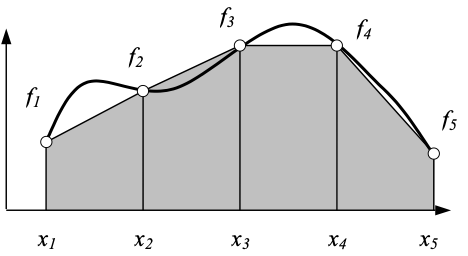
Rys. 7.4. Zasada trapezów dla wielu przedziałów

<h5>7.3.1.2. Zasada Simpsona</h5>

W przypadku zastosowania zasady Simpsona całkowany przedział interpolujemy wielomianem Lagrange’a drugiego stopnia:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $I=\int_{x_{1}}^{x_{2}}\left [ \frac{(x-x_{2})(x-x_{3})}{(x_{1}-x_{2})(x_{1}-x_{3})}f_{1}+\frac{(x-x_{1})(x-x_{3})}{(x_{2}-x_{1})(x_{2}-x_{3})}f_{2}+\frac{(x-x_{1})(x-x_{2})}{(x_{3}-x_{1})(x_{3}-x_{2})}f_{3}
 \right ]dx$
        </td>
        <td>(7.7)</td>
    </tr>
</table>
Potrzebne są wówczas trzy węzły (rys. 7.5). Po scałkowaniu wielomianu otrzymamy:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $I=\frac{h}{3}\left [ f_{1}+4f_{2}+f_{3} \right ]$
        </td>
        <td>(7.8)</td>
    </tr>
</table>

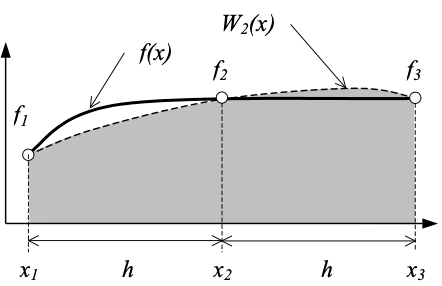
Rys. 7.5. Zasada Simpsona

Wartość błędu jest funkcją h<sup>5</sup>. Jeśli przedział całkowania podzielimy na podprzedziały, wówczas przybliżona wartość całki może zostać obliczona ze wzoru:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $I=\frac{h}{3}\left [ f_{1}+4\sum_{i=2,4,...}^{n-1}f_{i}+2\sum_{i=3,5,...}^{n-2}f_{i}+f_{n} \right ]$
        </td>
        <td>(7.9)</td>
    </tr>
</table>
Popełniany błąd jest w tym przypadku funkcją h<sup>4</sup>. 

<h5>7.3.2. Kwadratura Gaussa</h5>

Metody omawiane w poprzednim punkcie mają cechę wspólną polegającą na ściśle określonym położeniu węzłów. Okazuje się, że poprzez odpowiedni dobór położenia węzłów możemy minimalizować błąd całkowania. 

Położenie węzłów na rysunku 7.6 jest tak dobrane, że błędy, które wynikają z niedoszacowania całki są równoważone błędami wynikającymi z przeszacowania jej wartości. Ostatecznie błąd całkowity może być znacznie mniejszy niż w przypadku węzłów o ustalonych położeniach na końcach przedziału.

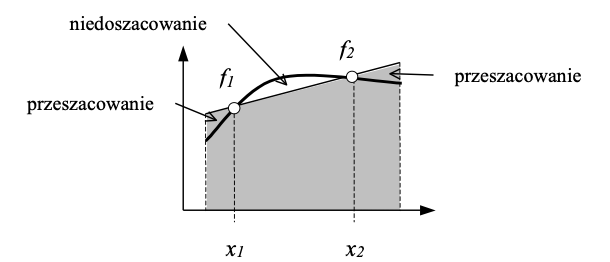
Rys. 7.6. Ilustracja kwadratury Gaussa

Problemem jest wskazanie właściwego położenia węzłów. W celu zademonstrowania idei wyboru położenia węzłów posłużmy się zapisem reguły trapezów, ale w uogólnionej formie, tzn. zamiast:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $I=\frac{h}{2}f_{1}+\frac{h}{2}f_{2}$
        </td>
        <td>(7.10)</td>
    </tr>
</table>
zapiszemy:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $I=c_{1}f(x_{1})+c_{2}f(x_{2})$
        </td>
        <td>(7.11)</td>
    </tr>
</table>
Zażądajmy, aby dla czterech różnych funkcji, od funkcji stałej do funkcji trzeciego stopnia, tj. położenie węzłów x<sub>1</sub>, x<sub>2</sub> i wartości stałych c<sub>1</sub>, c<sub>2</sub> były tak dobrane, aby błąd całkowania był równy zeru. Przyjmijmy granice całkowania w przedziale od –1 do 1. Mamy wówczas nieliniowy układ czterech równań: 
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $c_{1}f(x_{1}) +c_{2}f(x_{2})=\int_{-1}^{1}1 dx = 2$
        </td>
        <td>(7.12)</td>
    </tr>
    <tr>
        <td width=95% style="text-align:center">
        $c_{1}f(x_{1}) +c_{2}f(x_{2})=\int_{-1}^{1}x dx = 0$
        </td>
        <td>(7.13)</td>
    </tr>
    <tr>
        <td width=95% style="text-align:center">
        $c_{1}f(x_{1}) +c_{2}f(x_{2})=\int_{-1}^{1}x^{2} dx = \frac{2}{3}$
        </td>
        <td>(7.14)</td>
    </tr>
    <tr>
        <td width=95% style="text-align:center">
        $c_{1}f(x_{1}) +c_{2}f(x_{2})=\int_{-1}^{1}x^{3} dx = 0$
        </td>
        <td>(7.15)</td>
    </tr>
</table>
Wielkości c<sub>1</sub>, c<sub>2</sub>, x<sub>1</sub>, x<sub>2</sub>  oznaczmy odpowiednio x(1), x(2), x(3) i x(4), a równania (7.12--7.15), zapiszmy w postaci wektora f:

In [ ]:
def f(x):
    y = (x[0] + x[1] - 2, x[0]*x[2] + x[1]*x[3], x[0]*x[2]**2 + x[1]*x[3]**2-2.0/3.0, x[0]*x[2]**3 + x[1]*x[3]**3)
    return y

Ustalmy początkowe rozwiązanie dla stałych c(1) i c(2) równe zeru, a dla węzłów całkowania jak w przypadku zasady trapezów, czyli na brzegach przedziału, tzn. w punktach –1 i 1. Rozwiążmy układ równań:

In [ ]:
fsolve(f,(1.0, 1.0, -1.0, 1.0))

Otrzymane rozwiązanie: $c_{1}=c_{2}=1, x_{1}=-\frac{1}{\sqrt{3}}=-0.5773, x_{2}=\frac{1}{\sqrt{3}}=0.5773$, pozwala obliczyć wartość całki na podstawie zależności:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $I=f\left ( -\frac{1}{\sqrt{3}} \right )+f\left ( \frac{1}{\sqrt{3}} \right )$
        </td>
        <td>(7.16)</td>
    </tr>
</table>
W związku z tym, że w rozwiązaniu ogólnym przyjęto granicę całkowania <-1,1>, przed zastosowaniem wzoru do konkretnego przypadku obliczeniowego trzeba zmienić granice całkowania wg wzorów: 
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $x=\frac{b-a}{2}x_{d}+\frac{a+b}{2}$
        </td>
        <td>(7.17)</td>
    </tr>
</table>
oraz
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $dx = \frac{b-a}{2}dx_{d}$
        </td>
        <td>(7.18)</td>
    </tr>
</table>
gdzie: x<sub>d</sub> - nowa zmienna, a,b  - poprzednie granice całkowania.

<b>Przykład 7.3. Oblicz wartość całki za pomocą kwadratury Gaussa</b>

Oblicz całkę:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\int_{0}^{0.8}\left ( 400x^{5}-900x^{4}+675x^{3}-200x^{2}+25x+0.2 \right )dx$
        </td>
        <td>(7.19)</td>
    </tr>
</table>
Po zmianie granic mamy całkę w postaci:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\int_{-1}^{1}\left ( 400(0.4x_{d}+0.4)^{5}-900(0.4x_{d}+0.4)^{4}+675(0.4x_{d}+0.4)^{3}-200(0.4x_{d}+0.4)^{2}+25(0.4x_{d}+0.4)+0.2 \right )0.4dx_{d}$
        </td>
        <td>(7.20)</td>
    </tr>
</table>
Obliczamy wartości funkcji w węzłach całkowania:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $f\left ( -1 \right )=0.516741$
        </td>
        <td>(7.21)</td>
    </tr>
    <tr>
        <td width=95% style="text-align:center">
        $f\left ( 1 \right )=1.305837$
        </td>
        <td>(7.22)</td>
    </tr>
</table>
Wartość całki wynosi więc:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $I=0.516741+1.305837=1.822578$
        </td>
        <td>(7.23)</td>
    </tr>
</table>

<h3>7.4. PRZYKŁADY</h3>

<b>Przykład 7.4. Rozwiązanie przykładu 7.1</b>

Korzystanie z funkcji całkującej Pythona wymaga podania funkcji przybliżającej przebieg f(x). Na podstawie danych zamieszczonych w tabeli 7.1 oraz korzystając z interpolacji funkcją ```interpld``` opiszemy wykres z rysunku 7.1. 

Wykres ten ma dwa zakresy: liniowy, a po przekroczeniu granicy plastyczności – nieliniowy. Dlatego rozdzielmy dane na dwa zakresy i opiszmy je dwoma wielomianami k1 i k2:

In [ ]:
k1 = interp1d([0,0.0054],[0,323e6],'linear')
k2 = interp1d([0.0054,0.0407,0.1053,0.1597,0.2,0.2183], [323e6,402e6,458e6,477e6,473e6,452e6],'cubic')

Sprawdźmy, czy funkcje interpolujące poprawnie opisują wykres rozciągania (rys. 7.7):

In [ ]:
epsilon = np.array([0,0.0054,0.0407,0.1053,0.1597,0.2,0.2183])
pascal = np.array([0, 323e6, 402e6, 458e6, 477e6, 473e6, 452e6])
x1 = np.linspace(0.0,0.0054,20)
x2 = np.linspace(0.0054,0.2183,50)
plt.plot(epsilon, pascal,'ko')
plt.plot(x1, k1(x1),'k--')
plt.plot(x2, k2(x2),'k-')
plt.grid()
plt.show()

Rys. 7.7. Interpolacja wykresu rozciągania stopu aluminium

Teraz za pomocą polecenia quad możemy dokonać całkowania obu obszarów:

In [ ]:
p1 = quad(k1,0.0,0.0054)
print(p1)
print(p1[0])
p2 = quad(k2,0.0054,0.2183)
print(p2)
print(p2[0])

Energia rozciągania [Nm∙m<sup>-3</sup>] wyniesie więc:

In [ ]:
P=p1[0] + p2[0]
print(P)

<b>Przykład 7.5. Rozwiązanie przykładu 7.2</b>

Narysujmy wykres rozkładu prędkości (rys. 7.8):

In [ ]:
r = np.linspace(0,0.008,10);
v = lambda r: 10000.0*(0.008**2-r**2)/4/1e-3/10
plt.plot(r,v(r),'k-')
plt.grid()
plt.show()

Rys. 7.8. Rozkład prędkości przepływu płynu w rurce

Największą prędkość ciecz osiągnie w środku symetrii rurki. Wynosi ona 16 m∙s<sup>-1</sup>. Przy ściance rurki prędkość jest oczywiście równa zeru.

Obliczmy wartość całki:

In [ ]:
cobj = lambda r: 2*np.pi*r*10000.0*(0.008**2-r**2)*3600.0/4.0/1e-3/10.0
V = quad(cobj,0.0,0.008)
print(V[0])

W ciągu godziny przez rurkę przepłynie 5.79 m<sup>3</sup> cieczy.

<h3>7.5. ZADANIA</h3>

<h4>Zadanie 7.1</h4>

Wyznaczyć moment bezwładności półkola o promieniu R=50 mm, względem podstawy (rys. 7.9).

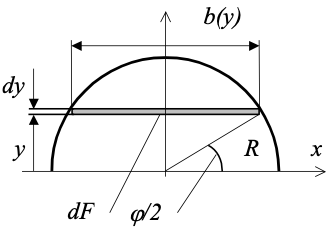
Rys. 7.9. Współrzędne przyjęte do obliczania momentu bezwładności

Na podstawie przyjętego układu współrzędnych mamy:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $I_{x}=\int_{F}y^{2}dF=\int_{0}^{R}y^{2}b(y)dy$
        </td>
        <td>(7.24)</td>
    </tr>
</table>
Po podstawieniu i uproszczeniu:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $I_{x}=-\frac{R^{4}}{4}\int_{\pi}^{0}sin^{2}\phi d\phi$
        </td>
        <td>(7.25)</td>
    </tr>
</table>

<h4>Zadanie 7.2</h4>

Wyznaczyć kąt skręcenia wałka stopniowanego (rys. 7.10). Dla części cylindrycznych można zastosować wzór $\phi = \frac{M_{s}l}{GI_{0}}$, a dla części stożkowej należy skorzystać z zależności $\phi=\int_{0}^{l}\frac{M_{s}}{GI_{0}}$, gdzie $I_{0}=\frac{\pi d(x)^{4}}{32}$.

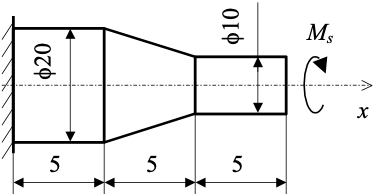
Rys. 7.10. Wałek skręcany

<h3>7.6. PYTANIA</h3>

1.	Czym różnią się wielomiany interpolacyjne w metodzie trapezów i w metodzie Simpsona?
2.	Wyjaśnij generalną różnicę pomiędzy zasadą Newtona-Cotesa a kwadraturą Gaussa.

<h3>7.7. LITERATURA</h3>

1.	Recktenwald G., 2000. Numerical Methods with MATLAB: Implementations and Applications. Prentice Hall.
2.	Chapra S.C., 1998. Numerical Method for Engineers with program and Software Applications. WCB/McGraw-Hill.

Copyright 2005-2019, dr inż. Krzysztof Nowicki